Edureka:

https://www.edureka.co/ai-deep-learning-with-tensorflow

Deep inside Autoencoders: https://towardsdatascience.com/deep-inside-autoencoders-7e41f319999f

In [1]:
import numpy as np

In [2]:
import tensorflow as tf

from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

from tensorflow.keras.datasets import cifar10

In [3]:
import matplotlib.pyplot as plt

The autoencoder

In [4]:
denoising_autoencoder = Sequential([
        Input(shape=(32, 32, 3)),
        # Encoder
        Conv2D(32, (3, 3), activation=relu, padding='same'),
        MaxPooling2D((2, 2), padding='same'),
        Conv2D(32, (3, 3), activation=relu, padding='same'),
        MaxPooling2D((2, 2), padding='same'),
        # Decoder
        Conv2D(32, (3, 3), activation=relu, padding='same'),
        UpSampling2D((2, 2)),
        Conv2D(32, (3, 3), activation=relu, padding='same'),
        UpSampling2D((2, 2)),
        Conv2D(3, (3, 3), activation=sigmoid, padding='same')
    ])

Configure our model to use a per-pixel binary crossentropy loss

In [5]:
denoising_autoencoder.compile(optimizer=Adam(), loss=MeanSquaredError())

Prepare our input data. We're using CIFAR images and we're discarding the labels

In [6]:
(x_train, _), (x_test, _) = cifar10.load_data()

Normalize all values between 0 and 1 and we will flatten the 28x28 imagesinto vectors of size 784

In [7]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [8]:
# Additional conversion to fix the type changes after added noise
x_train = tf.convert_to_tensor(x_train, np.float32)
x_test = tf.convert_to_tensor(x_test, np.float32)

In [9]:
print(x_train.shape)

(50000, 32, 32, 3)


In [10]:
print(x_test.shape)

(10000, 32, 32, 3)


Add random noise to images

In [11]:
noise_factor = 0.1

In [12]:
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape)
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)

In [13]:
x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.0)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.0)

Plot the noisy images

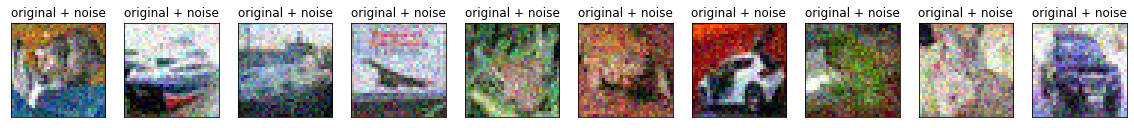

In [14]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title("original + noise")
plt.show()

Train autoencoder for 50 epochs

In [15]:
denoising_autoencoder.fit(x_train, x_train,
               epochs=20,
               batch_size=256,
               shuffle=True,
               validation_data=(x_test,x_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 133s 3ms/sample - loss: 0.0169 - val_loss: 0.0086
Epoch 2/20
50000/50000 [==============================] - 133s 3ms/sample - loss: 0.0075 - val_loss: 0.0067
Epoch 3/20
50000/50000 [==============================] - 136s 3ms/sample - loss: 0.0064 - val_loss: 0.0061
Epoch 4/20
50000/50000 [==============================] - 126s 3ms/sample - loss: 0.0058 - val_loss: 0.0054
Epoch 5/20
50000/50000 [==============================] - 102s 2ms/sample - loss: 0.0054 - val_loss: 0.0051
Epoch 6/20
50000/50000 [==============================] - 70s 1ms/sample - loss: 0.0051 - val_loss: 0.0052
Epoch 7/20
50000/50000 [==============================] - 72s 1ms/sample - loss: 0.0049 - val_loss: 0.0056
Epoch 8/20
50000/50000 [==============================] - 71s 1ms/sample - loss: 0.0047 - val_loss: 0.0045
Epoch 9/20
50000/50000 [==============================] - 73s 1ms/sample - loss: 0.0045 -

Encode and decode some images.

Note that we take them from the *test* set

In [16]:
decoded_imgs = denoising_autoencoder.predict(x_test)

Visualize the reconstructed inputs and the encoded representation.

In [19]:
n = 10 # how many images we will display

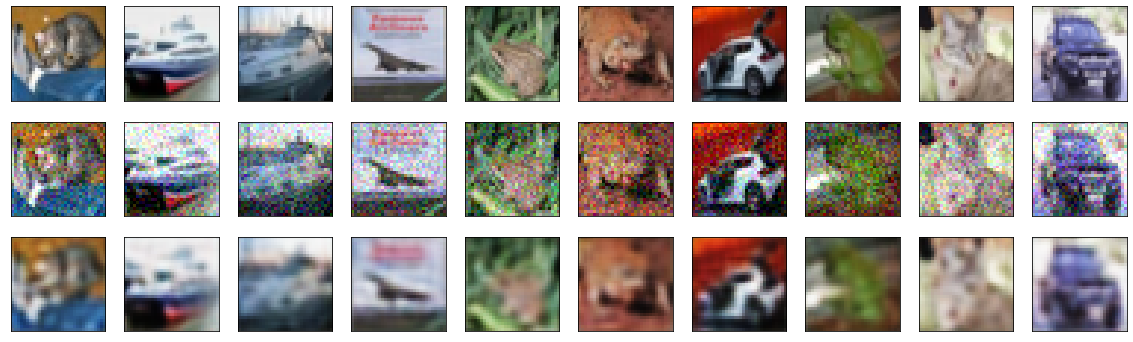

In [26]:
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(tf.squeeze(x_test[i]))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + 2* n)
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()